In [1]:
import geopandas as gpd
import rasterio
from rasterio import features
from PIL import Image

In [2]:
from rasterio.plot import show
from matplotlib import pyplot

In [3]:
import pprint

In [4]:
import numpy as np

In [5]:
outpath = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping\output'
path_to_tiff_folder = outpath + '\\georef'
path_to_output_folder = outpath + '\\tiff2shp'

In [6]:
filename = 'WD2021-0624_4'

In [7]:
inTIFF = path_to_tiff_folder + f'\\{filename}.tif'

In [8]:
src = rasterio.open(inTIFF)
r = src.read()

In [36]:
np.min(r)

0

In [37]:
np.max(r)

255

In [9]:
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb
import cv2

In [11]:
r = imread(inTIFF)

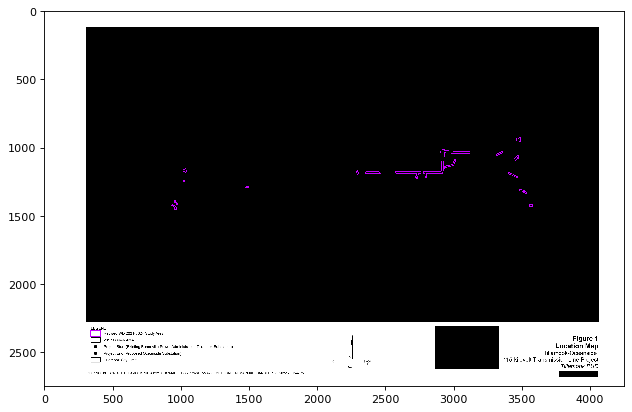

In [14]:
filtered = (r[:,:,0] == 197) & (r[:,:,1] == 0) & (r[:,:,2] == 255)
plt.figure(num=None, figsize=(8, 6), dpi=80)
r_new = r.copy()
r_new[:, :, 0] = r_new[:, :, 0] * filtered
r_new[:, :, 1] = r_new[:, :, 1] * filtered
r_new[:, :, 2] = r_new[:, :, 2] * filtered
imshow(r_new);

In [30]:
r1 = r_new[900:1500, 900:3600]

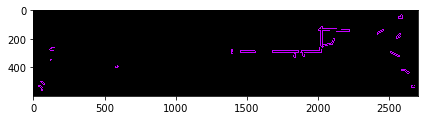

In [29]:
imshow(r1)

In [35]:
outTIFF = path_to_tiff_folder + f'\\{filename}c.tif'

In [33]:
import imageio

In [36]:
imageio.imwrite(outTIFF, r1)

In [15]:
with rasterio.open(inTIFF) as src:
    red=src.read(1)
    mask = red == 197
    shapes = features.shapes(red, mask=mask, transform=src.transform)

In [16]:
pprint.pprint(next(shapes))

({'coordinates': [[(7339664.0, 686532.0),
                   (7339664.0, 686520.0),
                   (7339676.0, 686520.0),
                   (7339676.0, 686532.0),
                   (7339664.0, 686532.0)]],
  'type': 'Polygon'},
 197.0)


In [29]:
shapes

<generator object shapes at 0x0000014F003A5C80>

In [17]:
fc = ({"geometry": shape, "properties": {"value": value}} for shape, value in shapes)

In [18]:
geojson_file = f'{path_to_output_folder}\\{filename}.geojson'

In [19]:
gpd.GeoDataFrame.from_features(fc).to_file(geojson_file, driver='GeoJSON')

In [20]:
gdf = gpd.read_file(geojson_file)

In [21]:
shp_file = f'{path_to_output_folder}\\{filename}.shp'

In [22]:
gdf.to_file(shp_file)

In [6]:
dataset = rasterio.open(inTIFF)

In [24]:
gdf = gpd.read_file(shp_file)

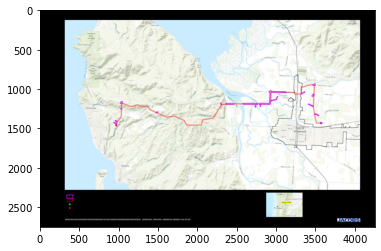

<AxesSubplot:>

In [8]:
show(dataset.read([1,2,3]))

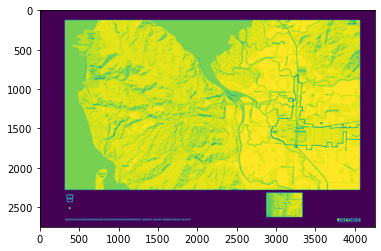

<AxesSubplot:>

In [9]:
show(dataset.read(1))